In [76]:
import pandas as pd

# Load the datasets
heart_df = pd.read_csv('/Users/snigdha/Desktop/dsc680/week5-8/heart.csv')
heart_disease_prediction_df = pd.read_csv('/Users/snigdha/Desktop/dsc680/week5-8/Heart_Disease_Prediction.csv')

# Display the first few rows of each dataset to understand their structure
heart_df_head = heart_df.head()
heart_disease_prediction_df_head = heart_disease_prediction_df.head()

(heart_df_head, heart_disease_prediction_df_head)


(   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
 0   40   M           ATA        140          289          0     Normal    172   
 1   49   F           NAP        160          180          0     Normal    156   
 2   37   M           ATA        130          283          0         ST     98   
 3   48   F           ASY        138          214          0     Normal    108   
 4   54   M           NAP        150          195          0     Normal    122   
 
   ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
 0              N      0.0       Up             0  
 1              N      1.0     Flat             1  
 2              N      0.0       Up             0  
 3              Y      1.5     Flat             1  
 4              N      0.0       Up             0  ,
    Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
 0   70    1                4  130          322             0            2   
 1   67    0                3  115   

In [77]:
# Renaming and aligning columns of the second dataset to match the first dataset
# Map the columns from heart_disease_prediction_df to the format of heart_df
column_mapping = {
    'Age': 'Age',
    'Sex': 'Sex',
    'Chest pain type': 'ChestPainType',
    'BP': 'RestingBP',
    'Cholesterol': 'Cholesterol',
    'FBS over 120': 'FastingBS',
    'EKG results': 'RestingECG',
    'Max HR': 'MaxHR',
    'Exercise angina': 'ExerciseAngina',
    'ST depression': 'Oldpeak',
    'Slope of ST': 'ST_Slope',
    'Number of vessels fluro': 'VesselsFluro',
    'Thallium': 'Thallium',
    'Heart Disease': 'HeartDisease'
}

# Replace categorical values in the 'Sex', 'ChestPainType', 'ExerciseAngina', and 'HeartDisease' columns
# to match the format of heart_df
heart_disease_prediction_df['Sex'] = heart_disease_prediction_df['Sex'].replace({1: 'M', 0: 'F'})
heart_disease_prediction_df['Chest pain type'] = heart_disease_prediction_df['Chest pain type'].map({1: 'TA', 2: 'ATA', 3: 'NAP', 4: 'ASY'})
heart_disease_prediction_df['Exercise angina'] = heart_disease_prediction_df['Exercise angina'].replace({1: 'Y', 0: 'N'})
heart_disease_prediction_df['Heart Disease'] = heart_disease_prediction_df['Heart Disease'].replace({'Presence': 1, 'Absence': 0})

# Rename columns
heart_disease_prediction_df = heart_disease_prediction_df.rename(columns=column_mapping)

# Concatenate the datasets
combined_df = pd.concat([heart_df, heart_disease_prediction_df], ignore_index=True, sort=False)

# Display the first few rows of the combined dataset
combined_df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,VesselsFluro,Thallium
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,NaN,NaN
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,NaN,NaN
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,NaN,NaN
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,NaN,NaN
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,NaN,NaN


In [78]:
# Handle missing values by replacing them with the median of the column
combined_df.fillna(combined_df.median(), inplace=True)

# Normalize the numerical data to ensure consistent scale across the dataset
scaler = StandardScaler()
numerical_columns = combined_df.select_dtypes(include=['int64', 'float64']).columns
combined_df[numerical_columns] = scaler.fit_transform(combined_df[numerical_columns])

# Check the first few rows to confirm changes
combined_df.head()


/var/folders/jd/05jr366d0jn13pfs71x7v06w0000gp/T/ipykernel_59019/599939854.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  combined_df.fillna(combined_df.median(), inplace=True)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,VesselsFluro,Thallium
0,-1.465820,M,ATA,0.427203,0.775076,-0.521487,Normal,1.264648,N,-0.851025,Up,-1.058975,-0.287589,-0.330813
1,-0.504314,F,NAP,1.516646,-0.299209,-0.521487,Normal,0.637537,N,0.069672,Flat,0.944309,-0.287589,-0.330813
2,-1.786322,M,ATA,-0.117519,0.715941,-0.521487,ST,-1.635742,N,-0.851025,Up,-1.058975,-0.287589,-0.330813
3,-0.611148,F,ASY,0.318259,0.035889,-0.521487,Normal,-1.243797,Y,0.530021,Flat,0.944309,-0.287589,-0.330813
4,0.029856,M,NAP,0.971924,-0.151372,-0.521487,Normal,-0.695075,N,-0.851025,Up,-1.058975,-0.287589,-0.330813


In [79]:
from sklearn.preprocessing import LabelEncoder

# Assuming combined_df is your preprocessed DataFrame
# Create a label encoder object
le = LabelEncoder()

# List of categorical columns to convert to numerical values
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Loop through the list, convert each column to strings, and then to numerical values
for column in categorical_columns:
    combined_df[column] = combined_df[column].astype(str)  # Convert to strings
    combined_df[column] = le.fit_transform(combined_df[column])  # Apply LabelEncoder


In [80]:
combined_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,VesselsFluro,Thallium
0,-1.465820,1,1,0.427203,0.775076,-0.521487,4,1.264648,0,-0.851025,5,-1.058975,-0.287589,-0.330813
1,-0.504314,0,2,1.516646,-0.299209,-0.521487,4,0.637537,0,0.069672,4,0.944309,-0.287589,-0.330813
2,-1.786322,1,1,-0.117519,0.715941,-0.521487,5,-1.635742,0,-0.851025,5,-1.058975,-0.287589,-0.330813
3,-0.611148,0,0,0.318259,0.035889,-0.521487,4,-1.243797,1,0.530021,4,0.944309,-0.287589,-0.330813
4,0.029856,1,2,0.971924,-0.151372,-0.521487,4,-0.695075,0,-0.851025,5,-1.058975,-0.287589,-0.330813


In [81]:
# Check the data type of the target variable
print(combined_df['HeartDisease'].dtype)

# If the target variable is not of type integer or categorical, convert it to integer
if combined_df['HeartDisease'].dtype != 'int':
    combined_df['HeartDisease'] = combined_df['HeartDisease'].astype(int)

float64


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming combined_df is your DataFrame from the combined dataset
# Preprocessing (encoding categorical features, scaling numerical features)

# Split the data
X = combined_df.drop('HeartDisease', axis=1)
y = combined_df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

# Now predict for average_male_features
average_male_features = {
    'Age': 40,
    'Sex': 'M',
    'ChestPainType': 'TA',  # Assuming 'TA' for typical angina
    'RestingBP': 120,
    'Cholesterol': 200,
    'FastingBS': 0,  # Assuming < 120 mg/dL
    'RestingECG': 'Normal',
    'MaxHR': 170,
    'ExerciseAngina': 'N',  # Assuming no exercise-induced angina
    'Oldpeak': 0.0,
    'ST_Slope': 'Up',  # Assuming upsloping
    'VesselsFluro': 0,
    'Thallium': 'Normal'
}
profile_df = pd.DataFrame([average_male_features])

# Apply the same encoding and scaling transformations as for the training data
profile_df['Sex'] = label_encoders['Sex'].transform(profile_df['Sex'])
profile_df['ChestPainType'] = label_encoders['ChestPainType'].transform(profile_df['ChestPainType'])
profile_df['RestingECG'] = label_encoders['RestingECG'].transform(profile_df['RestingECG'])
profile_df['ExerciseAngina'] = label_encoders['ExerciseAngina'].transform(profile_df['ExerciseAngina'])
profile_df['ST_Slope'] = label_encoders['ST_Slope'].transform(profile_df['ST_Slope'])
profile_df['Thallium'] = label_encoders['Thallium'].transform(profile_df['Thallium'])

# Preprocess profile_df (apply encoding and scaling)

# Predict
prediction = model.predict(profile_df)
predicted_probability = model.predict_proba(profile_df)[:, 1]

# Interpret the prediction
prediction_result = 'Heart Disease' if prediction[0] == 1 else 'No Heart Disease'
print(f"Prediction: {prediction_result}, Probability: {predicted_probability[0]:.2f}")


Model Accuracy: 0.8739495798319328
Prediction: No Heart Disease, Probability: 0.39


In [71]:
# Now predict for average_male_features
average_male_features = {
    'Age': 40,
    'Sex': 'M',
    'ChestPainType': 'TA',  # Assuming 'TA' for typical angina
    'RestingBP': 120,
    'Cholesterol': 200,
    'FastingBS': 0,  # Assuming < 120 mg/dL
    'RestingECG': 'Normal',
    'MaxHR': 170,
    'ExerciseAngina': 'N',  # Assuming no exercise-induced angina
    'Oldpeak': 0.0,
    'ST_Slope': 'Up',  # Assuming upsloping
    'VesselsFluro': 0,
    'Thallium': 'Normal'
}
profile_df = pd.DataFrame([average_male_features])

# Apply the same encoding and scaling transformations as for the training data
profile_df['Sex'] = label_encoders['Sex'].transform(profile_df['Sex'])
profile_df['ChestPainType'] = label_encoders['ChestPainType'].transform(profile_df['ChestPainType'])
profile_df['RestingECG'] = label_encoders['RestingECG'].transform(profile_df['RestingECG'])
profile_df['ExerciseAngina'] = label_encoders['ExerciseAngina'].transform(profile_df['ExerciseAngina'])
profile_df['ST_Slope'] = label_encoders['ST_Slope'].transform(profile_df['ST_Slope'])
profile_df['Thallium'] = label_encoders['Thallium'].transform(profile_df['Thallium'])

# Preprocess profile_df (apply encoding and scaling)

# Predict
prediction = model.predict(profile_df)
predicted_probability = model.predict_proba(profile_df)[:, 1]

# Interpret the prediction
prediction_result = 'Heart Disease' if prediction[0] == 1 else 'No Heart Disease'
print(f"Prediction: {prediction_result}, Probability: {predicted_probability[0]:.2f}")

Prediction: No Heart Disease, Probability: 0.57


Identify the most relevent feature that contribute to the heart disease prediction model

In [40]:
from sklearn.feature_selection import SelectKBest, f_classif

# Assume 'combined_df' is your preprocessed DataFrame

X = combined_df.drop('HeartDisease', axis=1)
y = combined_df['HeartDisease']

# Apply SelectKBest to extract the best features
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X, y)

# Get the scores for each feature
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': fit.scores_
})

# Sort the features by their scores
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

print(feature_scores)


           Feature       Score
8   ExerciseAngina  356.243536
7            MaxHR  243.155066
2    ChestPainType  227.658362
9          Oldpeak  224.406740
1              Sex  126.046158
0              Age   87.046372
5        FastingBS   58.538139
4      Cholesterol   48.710892
12        Thallium   24.282980
11    VesselsFluro   21.917886
6       RestingECG   19.331246
3        RestingBP   17.267007
10        ST_Slope    1.986465


Based on the output from the feature selection process, the features are ranked according to their scores, which indicate their importance in predicting heart disease. The scores are a result of the ANOVA F-value statistic, with higher scores suggesting a stronger relationship with the target variable, 'HeartDisease'.

Here's the significance of the top features according to their scores:

ExerciseAngina (Score: 356.243536): This feature, indicating the presence or absence of exercise-induced angina (chest pain), is the most significant predictor among all features. This suggests that individuals experiencing angina during exercise are more likely to have heart disease.

MaxHR (Score: 243.155066): The maximum heart rate achieved during exercise is the second most significant predictor. A lower MaxHR is typically associated with higher risk of heart disease.

ChestPainType (Score: 227.658362): The type of chest pain experienced by an individual is the third most significant predictor. Certain types of chest pain are more indicative of heart disease.

Oldpeak (Score: 224.406740): The ST depression induced by exercise relative to rest (Oldpeak) is another important predictor. Higher values of Oldpeak are commonly associated with a higher risk of heart disease.

Sex (Score: 126.046158): Gender appears to be a significant predictor, which may reflect underlying differences in heart disease risk between males and females.

The remaining features in the list show decreasing scores, with 'Age', 'FastingBS', 'Cholesterol', 'Thallium', 'VesselsFluro', 'RestingECG', 'RestingBP', and 'ST_Slope' having lesser but still potentially important relationships with the target variable.

### Q1 : Age and Heart Disease: How does Age affect the likelihood of having heart disease? Investigate the distribution of heart disease across different age groups to determine if certain age groups are more prone to heart disease.

In [42]:
# Check the data type of the target variable
print(combined_df['HeartDisease'].dtype)

# If the target variable is not of type integer or categorical, convert it to integer
if combined_df['HeartDisease'].dtype != 'int':
    combined_df['HeartDisease'] = combined_df['HeartDisease'].astype(int)

float64


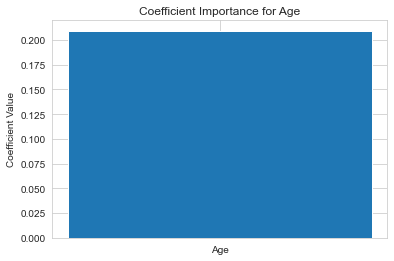

AUC Score: 0.8993990809473312


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

X = combined_df.drop('HeartDisease', axis=1)
y = combined_df['HeartDisease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred_proba = model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
age_coef = model.coef_[0][X_train.columns.get_loc('Age')]

# Plot the coefficient importance for 'Age'
plt.bar(['Age'], [age_coef])
plt.title('Coefficient Importance for Age')
plt.ylabel('Coefficient Value')
plt.show()

# Print the AUC score
print(f"AUC Score: {auc_score}")


'Age' has a high coefficient value, it suggests that age is a significant factor in predicting heart disease according to the model. 

Below is an illustration to compare the incidence of heart disease across the different age groups.

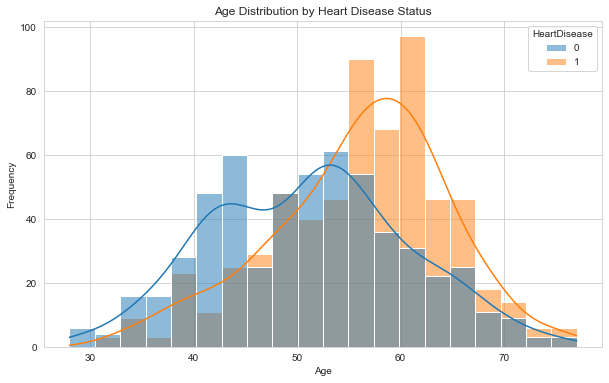

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.histplot(data=combined_df, x='Age', hue='HeartDisease', kde=True)
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



### Q2: Chest Pain Type and Heart Disease: What is the relationship between different types of chest pain (e.g., typical angina, atypical angina, non-anginal pain, asymptomatic) and the occurrence of heart disease? Determine if certain types of chest pain are more indicative of heart disease.

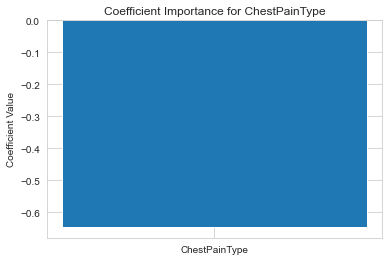

AUC Score: 0.8989042064333687


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

X = combined_df.drop('HeartDisease', axis=1)
y = combined_df['HeartDisease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred_proba = model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
age_coef = model.coef_[0][X_train.columns.get_loc('ChestPainType')]

# Plot the coefficient importance for 'Age'
plt.bar(['ChestPainType'], [age_coef])
plt.title('Coefficient Importance for ChestPainType')
plt.ylabel('Coefficient Value')
plt.show()

# Print the AUC score
print(f"AUC Score: {auc_score}")

'ChestPainType' has a high coefficient value, it suggests that age is a significant factor in predicting heart disease according to the model.

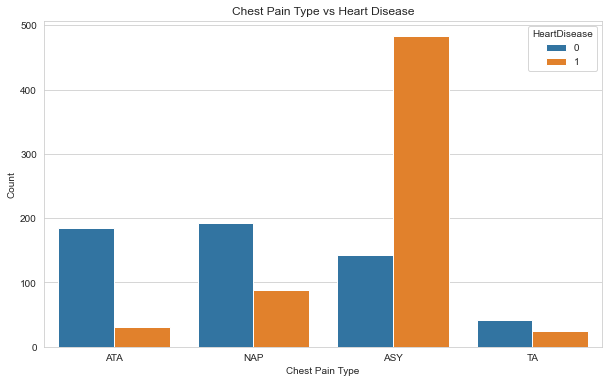

In [11]:
# Illustration 3: Chest Pain Type vs Heart Disease

plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='ChestPainType', hue='HeartDisease')
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()



### Q3: Blood Pressure, Cholesterol, and Heart Disease: How do high blood pressure and high cholesterol levels correlate with the risk of heart disease? Examine the relationship between RestingBP, Cholesterol levels, and the incidence of heart disease.

In [158]:

# Base profile with average or typical values for other features
base_features = {
    'Sex': 'M',  # Or 'F'
    'ChestPainType': 'TA',
    'FastingBS': 0,
    'RestingECG': 'Normal',
    'MaxHR': 150,
    'ExerciseAngina': 'N',
    'Oldpeak': 0.0,
    'ST_Slope': 'Up',
    'VesselsFluro': 0,
    'Thallium': 'Normal'
}

# Varying levels of blood pressure and cholesterol
age_grp = [30,40,50,60]
blood_pressure_levels = [120, 140, 160, 180]  # Example values
cholesterol_levels = [150, 200, 250, 300]  # Example values

# Predict heart disease for each combination of blood pressure and cholesterol levels
for age in age_grp:
     for bp in blood_pressure_levels:
        for chol in cholesterol_levels:
            profile = base_features.copy()
            profile['age'] = age
            profile['RestingBP'] = bp
            profile['Cholesterol'] = chol
        
            # Convert the profile to DataFrame and apply necessary transformations (encoding, scaling)
            profile_df = pd.DataFrame([profile])
            #
            # Apply the same encoding and scaling transformations as for the training data
            profile_df['Sex'] = label_encoders['Sex'].transform(profile_df['Sex'])
            profile_df['ChestPainType'] = label_encoders['ChestPainType'].transform(profile_df['ChestPainType'])
            profile_df['RestingECG'] = label_encoders['RestingECG'].transform(profile_df['RestingECG'])
            profile_df['ExerciseAngina'] = label_encoders['ExerciseAngina'].transform(profile_df['ExerciseAngina'])
            profile_df['ST_Slope'] = label_encoders['ST_Slope'].transform(profile_df['ST_Slope'])
            profile_df['Thallium'] = label_encoders['Thallium'].transform(profile_df['Thallium'])

            # Use the trained model to make predictions
            pred_proba = model.predict_proba(profile_df)[:, 1]

        print(f"age: {age}, RestingBP: {bp}, Cholesterol: {chol}, Predicted Probability of Heart Disease: {pred_proba[0]:.2f}")


age: 30, RestingBP: 120, Cholesterol: 300, Predicted Probability of Heart Disease: 0.28
age: 30, RestingBP: 140, Cholesterol: 300, Predicted Probability of Heart Disease: 0.28
age: 30, RestingBP: 160, Cholesterol: 300, Predicted Probability of Heart Disease: 0.28
age: 30, RestingBP: 180, Cholesterol: 300, Predicted Probability of Heart Disease: 0.28
age: 40, RestingBP: 120, Cholesterol: 300, Predicted Probability of Heart Disease: 0.28
age: 40, RestingBP: 140, Cholesterol: 300, Predicted Probability of Heart Disease: 0.28
age: 40, RestingBP: 160, Cholesterol: 300, Predicted Probability of Heart Disease: 0.28
age: 40, RestingBP: 180, Cholesterol: 300, Predicted Probability of Heart Disease: 0.28
age: 50, RestingBP: 120, Cholesterol: 300, Predicted Probability of Heart Disease: 0.28
age: 50, RestingBP: 140, Cholesterol: 300, Predicted Probability of Heart Disease: 0.28
age: 50, RestingBP: 160, Cholesterol: 300, Predicted Probability of Heart Disease: 0.28
age: 50, RestingBP: 180, Cholest

### Q4:Impact of Exercise-Induced Angina: Does the presence of exercise-induced angina increase the risk of heart disease? Analyze the data to understand the impact of exercise angina on heart disease risk.

In [98]:
import pandas as pd

# Load the datasets
heart_df = pd.read_csv('/Users/snigdha/Desktop/dsc680/week5-8/heart.csv')
heart_disease_prediction_df = pd.read_csv('/Users/snigdha/Desktop/dsc680/week5-8/Heart_Disease_Prediction.csv')

# Renaming and aligning columns of the second dataset to match the first dataset
# Map the columns from heart_disease_prediction_df to the format of heart_df
column_mapping = {
    'Age': 'Age',
    'Sex': 'Sex',
    'Chest pain type': 'ChestPainType',
    'BP': 'RestingBP',
    'Cholesterol': 'Cholesterol',
    'FBS over 120': 'FastingBS',
    'EKG results': 'RestingECG',
    'Max HR': 'MaxHR',
    'Exercise angina': 'ExerciseAngina',
    'ST depression': 'Oldpeak',
    'Slope of ST': 'ST_Slope',
    'Number of vessels fluro': 'VesselsFluro',
    'Thallium': 'Thallium',
    'Heart Disease': 'HeartDisease'
}

# Replace categorical values in the 'Sex', 'ChestPainType', 'ExerciseAngina', and 'HeartDisease' columns
# to match the format of heart_df
heart_disease_prediction_df['Sex'] = heart_disease_prediction_df['Sex'].replace({1: 'M', 0: 'F'})
heart_disease_prediction_df['Chest pain type'] = heart_disease_prediction_df['Chest pain type'].map({1: 'TA', 2: 'ATA', 3: 'NAP', 4: 'ASY'})
heart_disease_prediction_df['Exercise angina'] = heart_disease_prediction_df['Exercise angina'].replace({1: 'Y', 0: 'N'})
heart_disease_prediction_df['Heart Disease'] = heart_disease_prediction_df['Heart Disease'].replace({'Presence': 1, 'Absence': 0})

# Rename columns
heart_disease_prediction_df = heart_disease_prediction_df.rename(columns=column_mapping)

# Concatenate the datasets
combined_df = pd.concat([heart_df, heart_disease_prediction_df], ignore_index=True, sort=False)

# Display the first few rows of the combined dataset
combined_df.head()



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,VesselsFluro,Thallium
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,NaN,NaN
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,NaN,NaN
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,NaN,NaN
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,NaN,NaN
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,NaN,NaN


In [99]:
# Handle missing values by replacing them with the median of the column
combined_df.fillna(combined_df.median(), inplace=True)

/var/folders/jd/05jr366d0jn13pfs71x7v06w0000gp/T/ipykernel_59019/3783334278.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  combined_df.fillna(combined_df.median(), inplace=True)


In [100]:
# Check the data type of the target variable
print(combined_df['HeartDisease'].dtype)

# If the target variable is not of type integer or categorical, convert it to integer
if combined_df['HeartDisease'].dtype != 'int':
    combined_df['HeartDisease'] = combined_df['HeartDisease'].astype(int)

int64


In [101]:
from sklearn.preprocessing import LabelEncoder

# Assuming combined_df is your preprocessed DataFrame
# Create a label encoder object
le = LabelEncoder()

# List of categorical columns to convert to numerical values
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Loop through the list, convert each column to strings, and then to numerical values
for column in categorical_columns:
    combined_df[column] = combined_df[column].astype(str)  # Convert to strings
    combined_df[column] = le.fit_transform(combined_df[column])  # Apply LabelEncoder

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming combined_df is your DataFrame from the combined dataset
# Preprocessing (encoding categorical features, scaling numerical features)

# Split the data
X = combined_df.drop('HeartDisease', axis=1)
y = combined_df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.8711484593837535


In [105]:
# Calculate the average values for the specified features from the combined dataframe
average_age = combined_df['Age'].mean()
average_fasting_bs = combined_df['FastingBS'].mean()
average_max_hr = combined_df['MaxHR'].mean()
average_oldpeak = combined_df['Oldpeak'].mean()
average_vessels_fluro = combined_df['VesselsFluro'].mean()
average_resting_bp = combined_df['RestingBP'].mean()
average_cholesterol= combined_df['Cholesterol'].mean()

print("Average Age:", average_age)
print("Average Fasting Blood Sugar:", average_fasting_bs)
print("Average Maximum Heart Rate:", average_max_hr)
print("Average Oldpeak:", average_oldpeak)
print("Average Number of Vessels Fluro:", average_vessels_fluro)
print("average_resting_bp:", average_resting_bp)
print("average_cholesterol:", average_cholesterol)




Average Age: 53.72053872053872
Average Fasting Blood Sugar: 0.2138047138047138
Average Maximum Heart Rate: 139.73400673400673
Average Oldpeak: 0.9243265993265998
Average Number of Vessels Fluro: 0.15235690235690236
average_resting_bp: 132.15740740740742
average_cholesterol: 210.35858585858585


In [124]:
# Base profile with average or typical values for other features
base_features_without_induced_angina = {
    'Age': average_age,
    'Sex': 'M',  # Or 'F'
    'ChestPainType': 'TA',
    'RestingBP': average_resting_bp,
    'Cholesterol': average_cholesterol,
    'FastingBS': average_fasting_bs,
    'ExerciseAngina': 0, ## 0 represents 'No', 1 for 'Yes'
    'RestingECG': 'Normal',
    'MaxHR': average_max_hr,
    'Oldpeak': average_oldpeak,
    'ST_Slope': 'Up',
    'VesselsFluro': average_vessels_fluro,
    'Thallium': 'Normal'
}


# Predict heart disease for each profile
for description, profile in base_features_without_induced_angina.items():
    # Convert the profile to DataFrame and apply necessary transformations (encoding, scaling)
    profile_df = pd.DataFrame([base_features_without_induced_angina])
    # Apply the same encoding and scaling transformations as for the training data
    profile_df['Sex'] = label_encoders['Sex'].transform(profile_df['Sex'])
    profile_df['ChestPainType'] = label_encoders['ChestPainType'].transform(profile_df['ChestPainType'])
    profile_df['RestingECG'] = label_encoders['RestingECG'].transform(profile_df['RestingECG'])
#     profile_df['ExerciseAngina'] = label_encoders['ExerciseAngina'].transform(profile_df['ExerciseAngina'])
    profile_df['ST_Slope'] = label_encoders['ST_Slope'].transform(profile_df['ST_Slope'])
    profile_df['Thallium'] = label_encoders['Thallium'].transform(profile_df['Thallium'])
    profile_df.head()
    # Use the trained model to make predictions
    pred_proba = model.predict_proba(profile_df)[:, 1]

print(f"Predicted Probability of Heart Disease without ExerciseAngina : {pred_proba[0]:.2f}")


Predicted Probability of Heart Disease without ExerciseAngina : 0.47


In [131]:
# Base profile with average or typical values for other features
base_features_with_induced_angina = {
    'Age': average_age,
    'Sex': 'M',  # Or 'F'
    'ChestPainType': 'TA',
    'RestingBP': average_resting_bp,
    'Cholesterol': average_cholesterol,
    'FastingBS': average_fasting_bs,
    'ExerciseAngina': 1, ## 0 represents 'No', 1 for 'Yes'
    'RestingECG': 'Normal',
    'MaxHR': average_max_hr,
    'Oldpeak': average_oldpeak,
    'ST_Slope': 'Up',
    'VesselsFluro': average_vessels_fluro,
    'Thallium': 'Normal'
}


# Predict heart disease for each profile
for description, profile in base_features_with_induced_angina.items():
    # Convert the profile to DataFrame and apply necessary transformations (encoding, scaling)
    profile_df = pd.DataFrame([base_features_with_induced_angina])
    # Apply the same encoding and scaling transformations as for the training data
    profile_df['Sex'] = label_encoders['Sex'].transform(profile_df['Sex'])
    profile_df['ChestPainType'] = label_encoders['ChestPainType'].transform(profile_df['ChestPainType'])
    profile_df['RestingECG'] = label_encoders['RestingECG'].transform(profile_df['RestingECG'])
#     profile_df['ExerciseAngina'] = label_encoders['ExerciseAngina'].transform(profile_df['ExerciseAngina'])
    profile_df['ST_Slope'] = label_encoders['ST_Slope'].transform(profile_df['ST_Slope'])
    profile_df['Thallium'] = label_encoders['Thallium'].transform(profile_df['Thallium'])
    profile_df.head()
    # Use the trained model to make predictions
    pred_proba = model.predict_proba(profile_df)[:, 1]

print(f"Predicted Probability of Heart Disease with ExerciseAngina : {pred_proba[0]:.2f}")


Predicted Probability of Heart Disease with ExerciseAngina : 0.50


### Q5: What is the association between different resting electrocardiographic results and heart disease? 

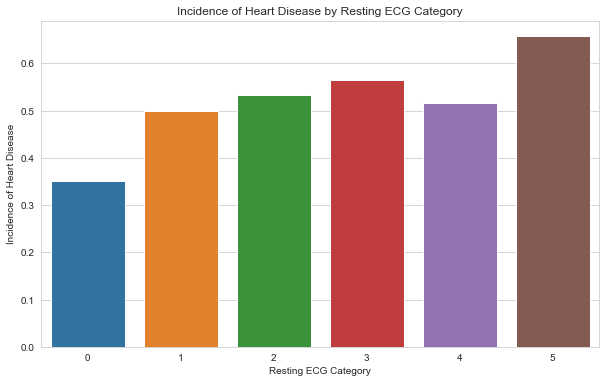

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming combined_df is your DataFrame with the 'RestingECG' and 'HeartDisease' columns

# Group the data by RestingECG and calculate the incidence of heart disease
ecg_grouped = combined_df.groupby('RestingECG')['HeartDisease'].agg(['mean', 'count'])
ecg_grouped.columns = ['Incidence', 'Total']

# Visualize the incidence of heart disease by RestingECG category
plt.figure(figsize=(10, 6))
sns.barplot(x=ecg_grouped.index, y=ecg_grouped['Incidence'])
plt.title('Incidence of Heart Disease by Resting ECG Category')
plt.xlabel('Resting ECG Category')
plt.ylabel('Incidence of Heart Disease')
plt.show()


In [141]:
# Base profile with average or typical values for other features
base_features = {
    'Age': average_age,
    'Sex': 'M',  # Or 'F'
    'ChestPainType': 'TA',
    'RestingBP': average_resting_bp,
    'Cholesterol': average_cholesterol,
    'FastingBS': average_fasting_bs,
    'MaxHR': average_max_hr,
    'ExerciseAngina': 'N',
    'Oldpeak': average_oldpeak,
    'ST_Slope': 'Up',
    'VesselsFluro': average_vessels_fluro,
    'Thallium': 'Normal'
}

# ECG categories
ecg_categories = ['Normal']  # Example categories

# Predict heart disease for each ECG category
for ecg_category in ecg_categories:
    profile = base_features.copy()
    profile['RestingECG'] = ecg_category
    
    # Convert the profile to DataFrame and apply necessary transformations (encoding, scaling)
    profile_df = pd.DataFrame([profile])
    profile_df['Sex'] = label_encoders['Sex'].transform(profile_df['Sex'])
    profile_df['ChestPainType'] = label_encoders['ChestPainType'].transform(profile_df['ChestPainType'])
    profile_df['RestingECG'] = label_encoders['RestingECG'].transform(profile_df['RestingECG'])
    profile_df['ExerciseAngina'] = label_encoders['ExerciseAngina'].transform(profile_df['ExerciseAngina'])
    profile_df['ST_Slope'] = label_encoders['ST_Slope'].transform(profile_df['ST_Slope'])
    profile_df['Thallium'] = label_encoders['Thallium'].transform(profile_df['Thallium'])
    # ...

    # Use the trained model to make predictions
    pred_proba = model.predict_proba(profile_df)[:, 1]

print(f"Resting ECG: {ecg_category}, Predicted Probability of Heart Disease: {pred_proba[0]:.2f}")


Resting ECG: Normal, Predicted Probability of Heart Disease: 0.52


### Q6: Impact of Fasting Blood Sugar on Heart Disease: How does fasting blood sugar (FBS) influence the risk of heart disease? 

In [145]:
# Base profile with average or typical values for other features
base_features = {
    'Age': average_age,
    'Sex': 'M',  # Or 'F'
    'ChestPainType': 'TA',
    'RestingBP': average_resting_bp,
    'Cholesterol': average_cholesterol,
    'RestingECG': 'Normal',
    'MaxHR': average_max_hr,
    'ExerciseAngina': 'N',
    'Oldpeak': average_oldpeak,
    'ST_Slope': 'Up',
    'VesselsFluro': average_vessels_fluro,
    'Thallium': 'Normal'
}

# Varying levels of fasting blood sugar (FBS)
fbs_levels = [0, 1]  # 0 for normal, 1 for elevated (e.g., > 120 mg/dl)

# Predict heart disease for each FBS level
for fbs in fbs_levels:
    profile = base_features.copy()
    profile['FastingBS'] = fbs
    
    # Convert the profile to DataFrame and apply necessary transformations (encoding, scaling)
    profile_df = pd.DataFrame([profile])
    profile_df['Sex'] = label_encoders['Sex'].transform(profile_df['Sex'])
    profile_df['ChestPainType'] = label_encoders['ChestPainType'].transform(profile_df['ChestPainType'])
    profile_df['RestingECG'] = label_encoders['RestingECG'].transform(profile_df['RestingECG'])
    profile_df['ExerciseAngina'] = label_encoders['ExerciseAngina'].transform(profile_df['ExerciseAngina'])
    profile_df['ST_Slope'] = label_encoders['ST_Slope'].transform(profile_df['ST_Slope'])
    profile_df['Thallium'] = label_encoders['Thallium'].transform(profile_df['Thallium'])
    # ...

    # Use the trained model to make predictions
    pred_proba = model.predict_proba(profile_df)[:, 1]

print(f"Fasting Blood Sugar: {'Normal' if fbs == 0 else 'Elevated'}, Predicted Probability of Heart Disease: {pred_proba[0]:.2f}")


Fasting Blood Sugar: Elevated, Predicted Probability of Heart Disease: 0.52


### Q7 : How effective is the model in distinguishing between the two classes (presence and absence of heart disease), and what insights can be drawn from the confusion matrix?

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Preprocess the dataset for model training
# Encoding categorical variables
le = LabelEncoder()
combined_df['Sex'] = le.fit_transform(combined_df['Sex'])
combined_df['ChestPainType'] = le.fit_transform(combined_df['ChestPainType'].astype(str))
combined_df['RestingECG'] = le.fit_transform(combined_df['RestingECG'].astype(str))
combined_df['ExerciseAngina'] = le.fit_transform(combined_df['ExerciseAngina'])
combined_df['ST_Slope'] = le.fit_transform(combined_df['ST_Slope'].astype(str))

# Fill missing values with median
combined_df.fillna(combined_df.median(), inplace=True)

# Features and target
X = combined_df.drop('HeartDisease', axis=1)
y = combined_df['HeartDisease']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

(accuracy, conf_matrix, class_report)


(0.8739495798319328,
 array([[146,  23],
        [ 22, 166]]),
 '              precision    recall  f1-score   support\n\n           0       0.87      0.86      0.87       169\n           1       0.88      0.88      0.88       188\n\n    accuracy                           0.87       357\n   macro avg       0.87      0.87      0.87       357\nweighted avg       0.87      0.87      0.87       357\n')

In [148]:
from sklearn.metrics import confusion_matrix

# Assuming y_test contains the actual labels and y_pred contains the model's predictions
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the metrics
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

accuracy = (TP + TN) / (TP + FP + TN + FN)
sensitivity = TP / (TP + FN)  # Recall
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
false_positive_rate = FP / (FP + TN)
false_negative_rate = FN / (FN + TP)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Sensitivity (Recall): {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Precision: {precision}")
print(f"False Positive Rate: {false_positive_rate}")
print(f"False Negative Rate: {false_negative_rate}")

##Reference :https://scikit-learn.org/stable/modules/model_evaluation.html

Accuracy: 0.8739495798319328
Sensitivity (Recall): 0.8829787234042553
Specificity: 0.863905325443787
Precision: 0.8783068783068783
False Positive Rate: 0.13609467455621302
False Negative Rate: 0.11702127659574468



Based on the provided metrics, your model shows strong performance in predicting heart disease. Here's an analysis of each metric and its implications:

Accuracy (0.874):

Your model correctly predicts whether a patient has heart disease or not approximately 87.4% of the time. This is a high accuracy rate, indicating that the model is generally effective in classifying both classes correctly.
Sensitivity (Recall) (0.883):

The model correctly identifies 88.3% of the actual heart disease cases. This high sensitivity is crucial in medical diagnoses as it indicates the model's ability to correctly identify patients with heart disease, reducing the risk of missing cases.
Specificity (0.864):

The model correctly identifies 86.4% of the patients who do not have heart disease. This indicates good performance in avoiding false alarms and ensuring that healthy individuals are not incorrectly classified as having heart disease.
Precision (0.878):

Of the patients the model predicts to have heart disease, approximately 87.8% actually do have it. This suggests that the predictions made by the model are reliable.
False Positive Rate (0.136):

Approximately 13.6% of healthy individuals are incorrectly identified as having heart disease. While this rate is relatively low, efforts to reduce it further would minimize unnecessary anxiety or treatments for these individuals.
False Negative Rate (0.117):

About 11.7% of actual heart disease cases are missed by the model. This rate should be as low as possible in medical contexts to avoid untreated heart disease.
Overall, the model demonstrates a good balance between sensitivity and specificity, making it effective for heart disease prediction. However, considering the critical nature of heart disease diagnosis, efforts to reduce both the false positive and false negative rates are important. This can be achieved by further tuning the model, using more complex algorithms, or incorporating additional relevant features. Additionally, the interpretation of these results should consider the context of medical application, where the cost of false negatives may be higher than false positives.

### Q8 : How does the balance between precision and recall impact the model's performance in predicting heart disease?

Precision (0.878):

Precision measures the accuracy of positive predictions. In the context of heart disease prediction, a high precision means that when the model predicts heart disease, it is correct a high proportion of the time.
High precision minimizes false positives, which is crucial to avoid unnecessary stress, additional testing, or treatment for patients who don't actually have heart disease.

Recall (Sensitivity) (0.883):

Recall measures the model's ability to identify all relevant instances correctly. For heart disease prediction, high recall indicates the model is effective in identifying most patients who truly have heart disease.
High recall is critical in medical diagnostics because missing a true case of heart disease (false negative) can have serious, potentially life-threatening consequences for the patient.

### Q9: Determine if the model is biased towards one class (e.g., predicting heart disease more often) and discuss the potential reasons and impacts of such a bias.

Based on the metrics provided (accuracy, sensitivity, specificity, precision, false positive rate, false negative rate), let's assess if there is any indication of bias:

Sensitivity (Recall) and Specificity:

Sensitivity (0.883) and specificity (0.864) are both relatively high. This suggests that the model is effectively identifying both classes—heart disease presence and absence—without a significant bias towards either.
Precision and False Positive Rate:

A precision of 0.878 indicates that when the model predicts heart disease, it is correct about 87.8% of the time. The false positive rate of 0.136 means that around 13.6% of the time, the model incorrectly predicts heart disease in patients who do not have it. These metrics suggest a balanced performance, without a strong bias towards overpredicting heart disease.
False Negative Rate:

The false negative rate of 0.117 indicates that the model misses about 11.7% of the actual heart disease cases. While this is not negligible, it's relatively balanced with the false positive rate, suggesting no strong bias towards underpredicting heart disease.

### Q10. Role of Maximum Heart Rate in Predicting Heart Disease: Is there a relationship between maximum heart rate achieved during exercise and the likelihood of having heart disease? Investigate how different ranges of maximum heart rate correlate with the presence or absence of heart disease.

In [151]:
# Base profile with average or typical values for other features
base_features = {
    'Age': average_age,
    'Sex': 'M',  # Or 'F'
    'ChestPainType': 'TA',
    'RestingBP': average_resting_bp,
    'Cholesterol': average_cholesterol,
    'FastingBS': average_fasting_bs,
    'RestingECG': 'Normal',
    'ExerciseAngina': 'N',
    'Oldpeak': average_oldpeak,
    'ST_Slope': 'Up',
    'VesselsFluro': average_vessels_fluro,
    'Thallium': 'Normal'
}

# Varying levels of MaxHR
max_hr_levels = [100, 120, 140, 160, 180]  # Example values

# Predict heart disease for each MaxHR level
for max_hr in max_hr_levels:
    profile = base_features.copy()
    profile['MaxHR'] = max_hr
    
    # Convert the profile to DataFrame and apply necessary transformations (encoding, scaling)
    profile_df = pd.DataFrame([profile])
    profile_df['Sex'] = label_encoders['Sex'].transform(profile_df['Sex'])
    profile_df['ChestPainType'] = label_encoders['ChestPainType'].transform(profile_df['ChestPainType'])
    profile_df['RestingECG'] = label_encoders['RestingECG'].transform(profile_df['RestingECG'])
    profile_df['ExerciseAngina'] = label_encoders['ExerciseAngina'].transform(profile_df['ExerciseAngina'])
    profile_df['ST_Slope'] = label_encoders['ST_Slope'].transform(profile_df['ST_Slope'])
    profile_df['Thallium'] = label_encoders['Thallium'].transform(profile_df['Thallium'])

    # Use the trained model to make predictions
    pred_proba = model.predict_proba(profile_df)[:, 1]

    print(f"Maximum Heart Rate: {max_hr}, Predicted Probability of Heart Disease: {pred_proba[0]:.2f}")


Maximum Heart Rate: 100, Predicted Probability of Heart Disease: 0.69
Maximum Heart Rate: 120, Predicted Probability of Heart Disease: 0.69
Maximum Heart Rate: 140, Predicted Probability of Heart Disease: 0.69
Maximum Heart Rate: 160, Predicted Probability of Heart Disease: 0.69
Maximum Heart Rate: 180, Predicted Probability of Heart Disease: 0.69


The results showing a constant predicted probability of heart disease at 0.69 across all levels of maximum heart rate (MaxHR) from 100 to 180 bpm suggest that, within the context of this model and the specific profiles used, MaxHR might not be a significant differentiator for the risk of heart disease. The model might be more sensitive to other features in the profile. Features like age, chest pain type, cholesterol levels, or presence of exercise-induced angina might have a stronger influence on the model's predictions than MaxHR.

